In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import Normalize, LogNorm
from matplotlib import colormaps
import matplotlib as mpl
from matplotlib.patches import Rectangle
from astropy.coordinates import Angle, SkyCoord
import astropy.units as u
import pickle
import glob

%matplotlib notebook

In [2]:
results_files = glob.glob("FullGrid_Tracks/FitResults/Fast/vel*.pkl")
results_files_hi = glob.glob("FullGrid_Tracks/FitResults/Fast/hi**.pkl")

In [3]:
results_dict = {}
for file in results_files:
    vel = float(file.split("/")[-1].split("vel_")[-1].split(".pkl")[0])
    with open(file, "rb") as f:
        result = pickle.load(f)
     
    results_dict["{0:.1f}".format(vel)] = result
    
results_dict_hi = {}
for file in results_files_hi:
    vel = float(file.split("/")[-1].split("hi_vel_")[-1].split(".pkl")[0])
    with open(file, "rb") as f:
        result = pickle.load(f)
     
    results_dict_hi["{0:.1f}".format(vel)] = result
    

<IPython.core.display.Javascript object>


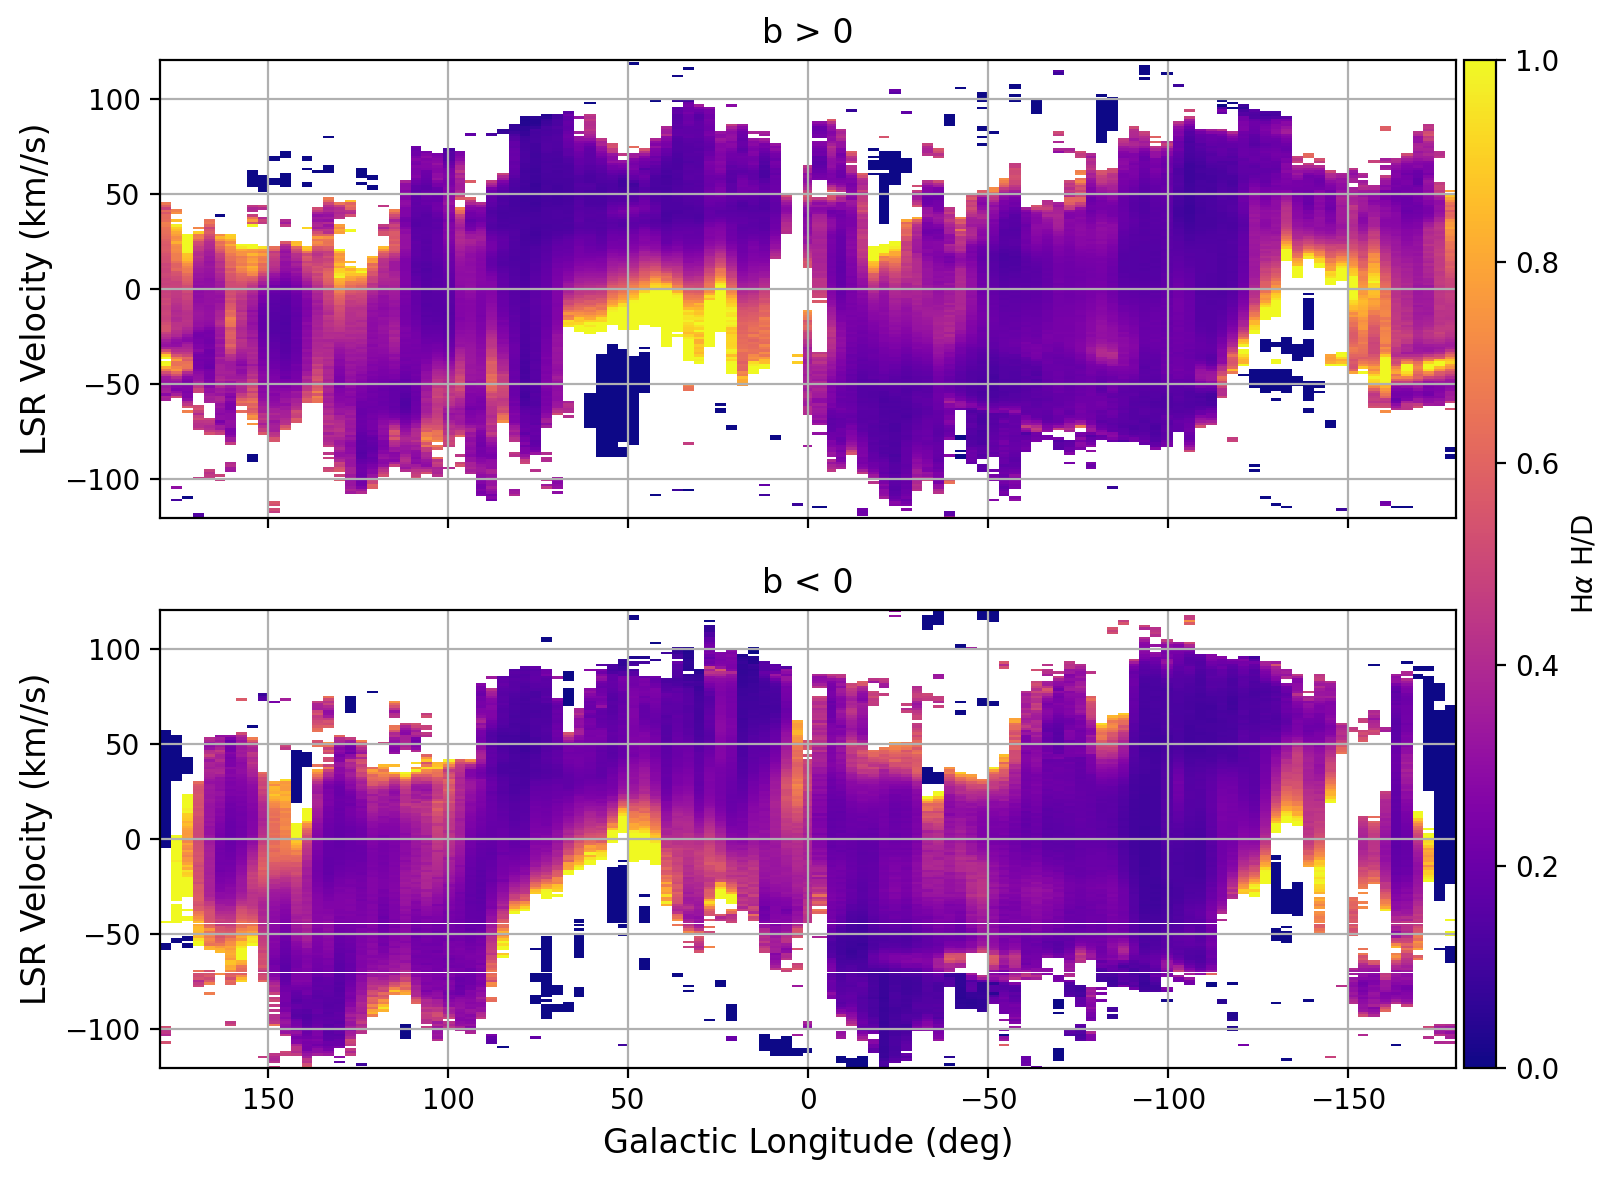

In [13]:
fig,(axpos, axneg) = plt.subplots(2,1, sharex = True, sharey = True, figsize = (8,6))

axneg.set_xlabel("Galactic Longitude (deg)", fontsize = 12)
axneg.set_ylabel("LSR Velocity (km//s)", fontsize = 12)
axpos.set_ylabel("LSR Velocity (km//s)", fontsize = 12)

axpos.set_title("b > 0", fontsize = 12)
axneg.set_title("b < 0", fontsize = 12)
axpos.set_xlim(180,-180)
axpos.grid()
axneg.grid()


# axpos.set_xlim(180,-180)

norm = Normalize(vmin = 0, vmax = 1)

height = 1.29
width = 3

cmap = colormaps["plasma"]

plt.subplots_adjust(right = 0.91, top = .95, left = .1)    
cax = fig.add_axes([0.915,.11,.02,.84])
cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), orientation='vertical', 
             label=r'H$\alpha$ H/D', cax = cax)

keys = list(results_dict.keys())

# vel = keys[0]

for vel in keys:
    fit_result = results_dict[vel]

    # Quality Mask
    mask_pos = fit_result["slopes_pos_err"]/np.abs(fit_result["slopes_pos"]) > .3 
    mask_neg = fit_result["slopes_neg_err"]/np.abs(fit_result["slopes_neg"]) > .3
    longitudes = fit_result["median_longitude"]
    lon_edges = longitudes - 1.5
    lon_edges = np.append(lon_edges, longitudes[-1]+1.5)
    vel_edges  = np.array([float(vel) - height/2, float(vel) + height/2])

    x,y = np.meshgrid(lon_edges, vel_edges)


    H_pos = np.ma.masked_array(data = 1/-fit_result["slopes_pos"], mask = mask_pos).reshape(1,119)
    H_neg = np.ma.masked_array(data = 1/fit_result["slopes_neg"], mask = mask_neg).reshape(1,119)


    axpos.pcolormesh(x,y, H_pos, cmap = cmap, norm = norm)
    axneg.pcolormesh(x,y, H_neg, cmap = cmap, norm = norm)
    
plt.savefig("ScaleHeight_HAlpha_Grid.png", dpi = 300, transparent = True)

<IPython.core.display.Javascript object>


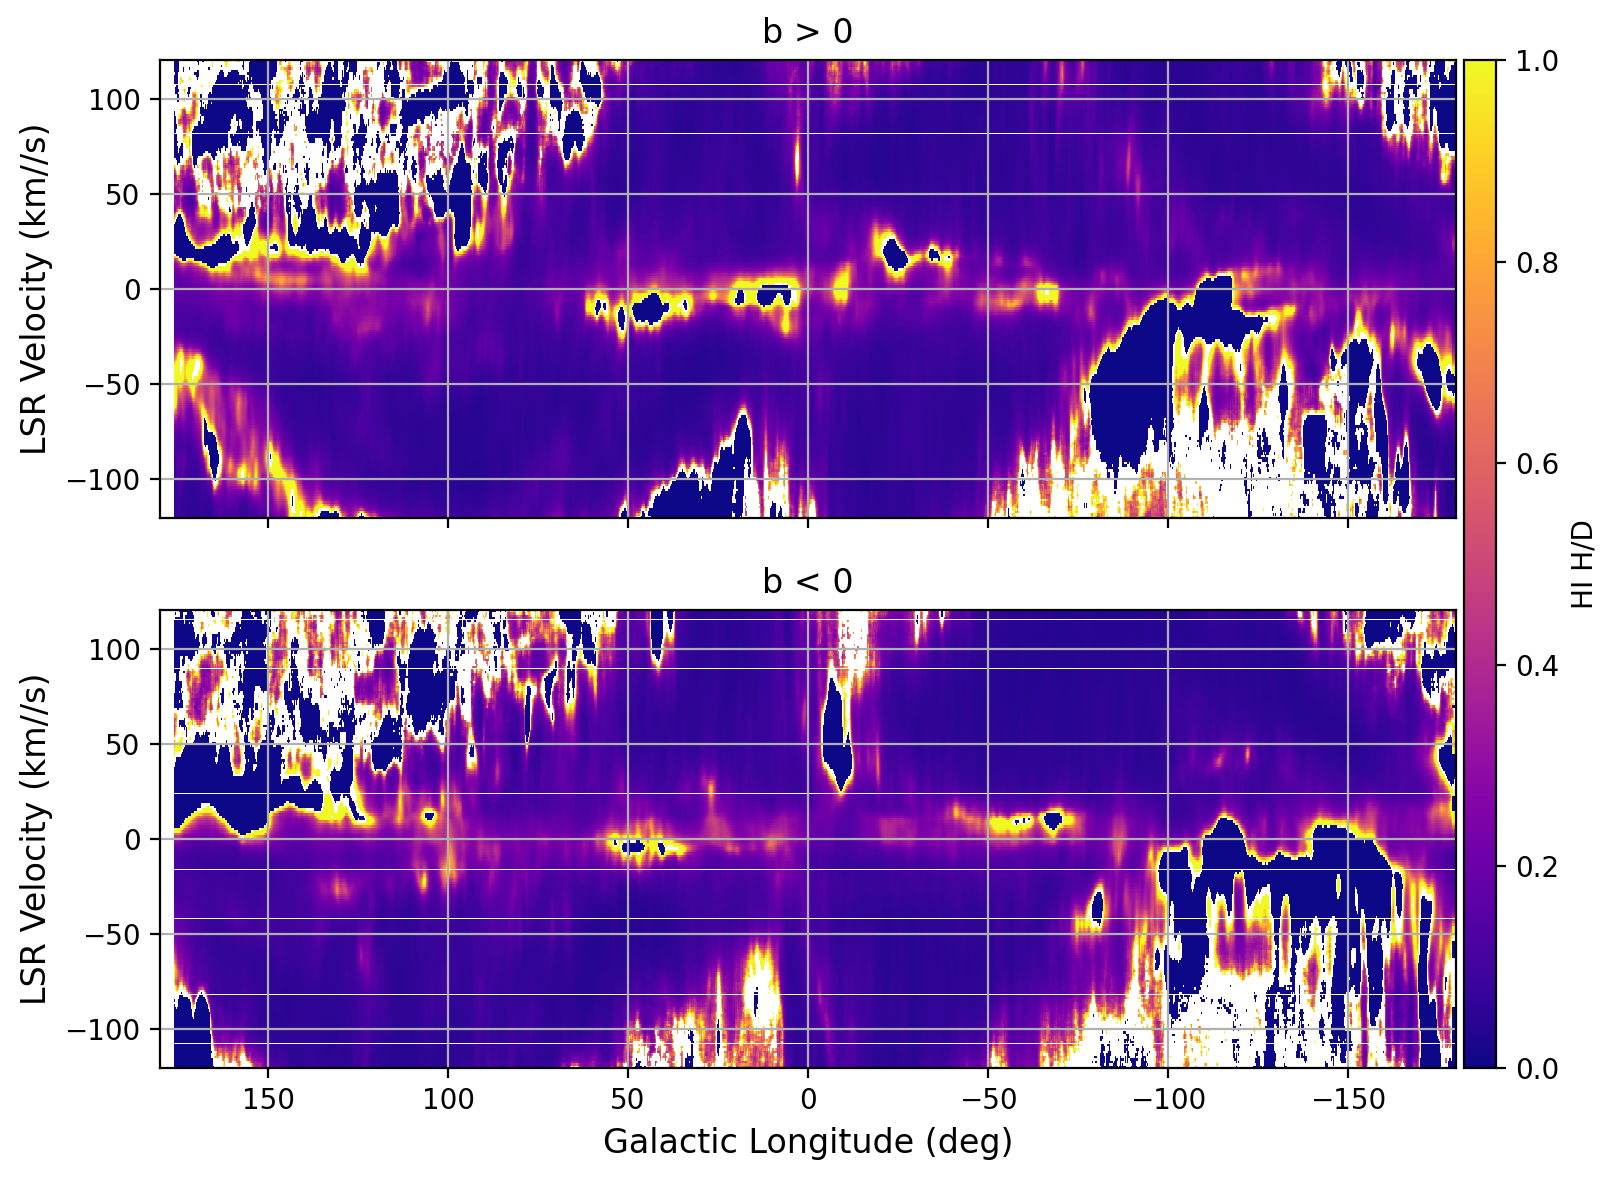

In [5]:
fig,(axpos, axneg) = plt.subplots(2,1, sharex = True, sharey = True, figsize = (8,6))

axneg.set_xlabel("Galactic Longitude (deg)", fontsize = 12)
axneg.set_ylabel("LSR Velocity (km//s)", fontsize = 12)
axpos.set_ylabel("LSR Velocity (km//s)", fontsize = 12)

axpos.set_title("b > 0", fontsize = 12)
axneg.set_title("b < 0", fontsize = 12)
axpos.set_xlim(180,-180)
axpos.grid()
axneg.grid()


# axpos.set_xlim(180,-180)

norm = Normalize(vmin = 0, vmax = 1)

height = 1.29
width = 3

cmap = colormaps["plasma"]

plt.subplots_adjust(right = 0.91, top = .95, left = .1)    
cax = fig.add_axes([0.915,.11,.02,.84])
cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), orientation='vertical', 
             label='HI H/D', cax = cax)

keys = list(results_dict_hi.keys())

# vel = keys[0]

for vel in keys:
    fit_result = results_dict_hi[vel]

    # Quality Mask
    mask_pos = fit_result["slopes_pos_err"]/np.abs(fit_result["slopes_pos"]) > .3 
    mask_neg = fit_result["slopes_neg_err"]/np.abs(fit_result["slopes_neg"]) > .3
    longitudes = Angle(fit_result["median_longitude"]*u.deg).wrap_at("180d").value
    lon_edges = longitudes - 0.5
    lon_edges = np.append(lon_edges, longitudes[-1]+0.5)
    vel_edges  = np.array([float(vel) - height/2, float(vel) + height/2])

    x,y = np.meshgrid(lon_edges, vel_edges)


    H_pos = np.ma.masked_array(data = 1/-fit_result["slopes_pos"], mask = mask_pos).reshape(1,4272)
    H_neg = np.ma.masked_array(data = 1/fit_result["slopes_neg"], mask = mask_neg).reshape(1,4272)


    axpos.pcolormesh(x,y, H_pos, cmap = cmap, norm = norm)
    axneg.pcolormesh(x,y, H_neg, cmap = cmap, norm = norm)
    
plt.savefig("ScaleHeight_HI_Grid.png", dpi = 300, transparent = True)

<IPython.core.display.Javascript object>


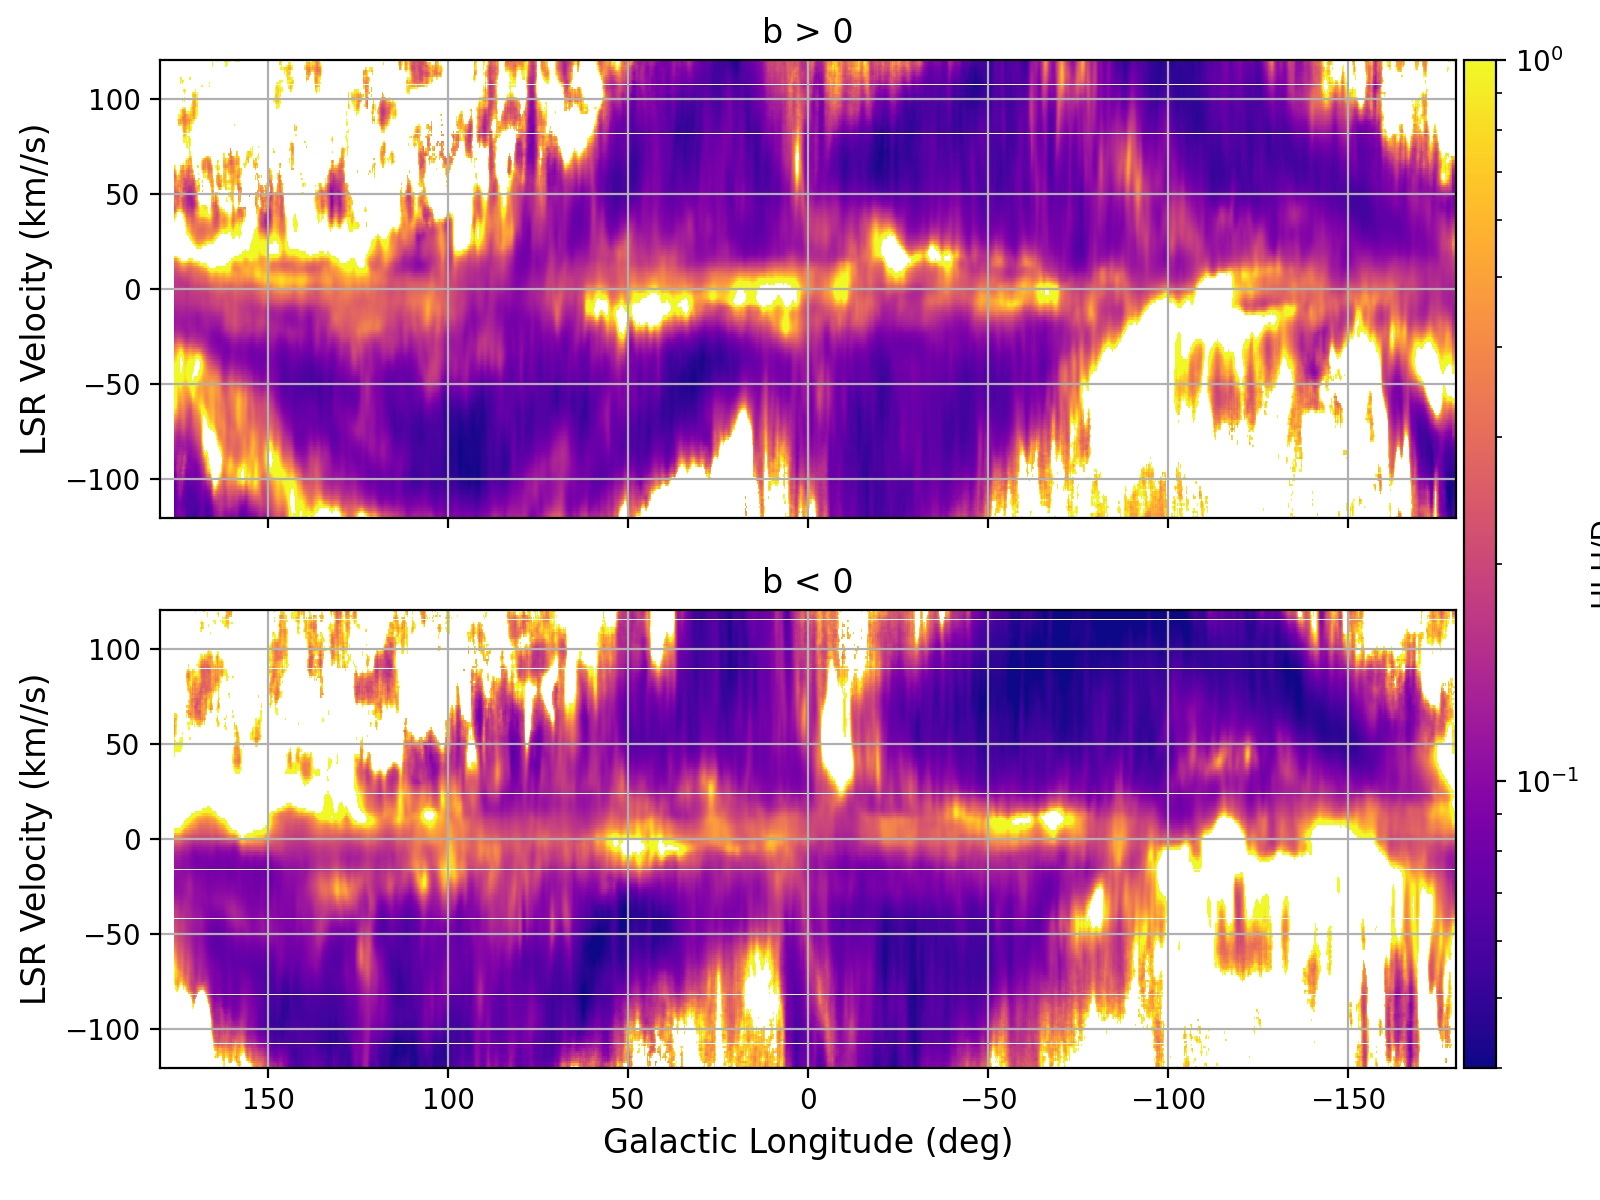

In [26]:
fig,(axpos, axneg) = plt.subplots(2,1, sharex = True, sharey = True, figsize = (8,6))

axneg.set_xlabel("Galactic Longitude (deg)", fontsize = 12)
axneg.set_ylabel("LSR Velocity (km//s)", fontsize = 12)
axpos.set_ylabel("LSR Velocity (km//s)", fontsize = 12)

axpos.set_title("b > 0", fontsize = 12)
axneg.set_title("b < 0", fontsize = 12)
axpos.set_xlim(180,-180)
axpos.grid()
axneg.grid()


# axpos.set_xlim(180,-180)

norm = LogNorm(vmin = 4e-2, vmax = 1)

height = 1.29
width = 3

cmap = colormaps["plasma"]

plt.subplots_adjust(right = 0.91, top = .95, left = .1)    
cax = fig.add_axes([0.915,.11,.02,.84])
cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), orientation='vertical', 
             label='HI H/D', cax = cax)

keys = list(results_dict_hi.keys())

# vel = keys[0]

for vel in keys:
    fit_result = results_dict_hi[vel]

    # Quality Mask
    mask_pos = fit_result["slopes_pos_err"]/np.abs(fit_result["slopes_pos"]) > .3 
    mask_neg = fit_result["slopes_neg_err"]/np.abs(fit_result["slopes_neg"]) > .3
    longitudes = Angle(fit_result["median_longitude"]*u.deg).wrap_at("180d").value
    lon_edges = longitudes - 0.5
    lon_edges = np.append(lon_edges, longitudes[-1]+0.5)
    vel_edges  = np.array([float(vel) - height/2, float(vel) + height/2])

    x,y = np.meshgrid(lon_edges, vel_edges)


    H_pos = np.ma.masked_array(data = 1/-fit_result["slopes_pos"], mask = mask_pos).reshape(1,4272)
    H_neg = np.ma.masked_array(data = 1/fit_result["slopes_neg"], mask = mask_neg).reshape(1,4272)


    axpos.pcolormesh(x,y, H_pos, cmap = cmap, norm = norm)
    axneg.pcolormesh(x,y, H_neg, cmap = cmap, norm = norm)
    
plt.savefig("ScaleHeight_HI_Grid_logScale.png", dpi = 300, transparent = True)

<IPython.core.display.Javascript object>


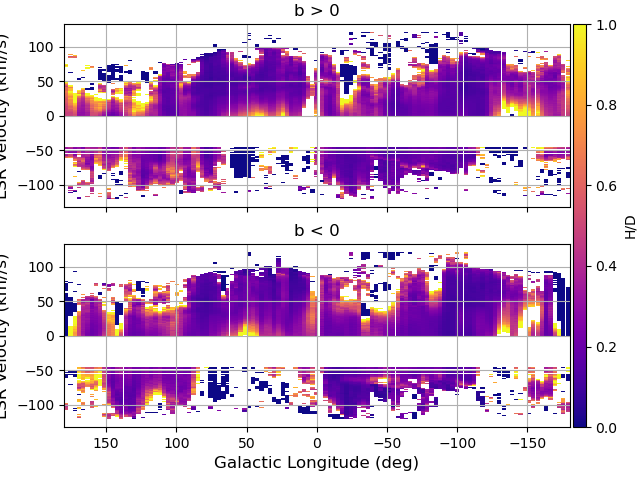

KeyboardInterrupt: 

In [5]:
fig,(axpos, axneg) = plt.subplots(2,1, sharex = True, sharey = True)

axneg.set_xlabel("Galactic Longitude (deg)", fontsize = 12)
axneg.set_ylabel("LSR Velocity (km//s)", fontsize = 12)
axpos.set_ylabel("LSR Velocity (km//s)", fontsize = 12)

axpos.set_title("b > 0", fontsize = 12)
axneg.set_title("b < 0", fontsize = 12)
axpos.set_xlim(180,-180)
axpos.grid()
axneg.grid()


# axpos.set_xlim(180,-180)

norm = Normalize(vmin = 0, vmax = 1)

height = 1.29
width = 3

cmap = colormaps["plasma"]

plt.subplots_adjust(right = 0.89, top = .95, left = .1)    
cax = fig.add_axes([0.905-0.01,.11,.02,.84])
cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), orientation='vertical', 
             label='H/D', cax = cax)

keys = list(results_dict.keys())

# vel = keys[0]

for vel in keys:
    fit_result = results_dict[vel]

    # Quality Mask
    good_pos = fit_result["slopes_pos_err"]/np.abs(fit_result["slopes_pos"]) < 0.5 
    good_neg = fit_result["slopes_neg_err"]/np.abs(fit_result["slopes_neg"]) < 0.5
    longitudes = fit_result["median_longitude"]

    lons_pos = longitudes[good_pos]
    lons_neg = longitudes[good_neg]

    H_pos = 1/-fit_result["slopes_pos"][good_pos]
    H_neg = 1/fit_result["slopes_neg"][good_neg]

    for l,h in zip(lons_pos, H_pos):
        sc = axpos.scatter(l,float(vel), s = 0)
        patch = axpos.add_patch(Rectangle(
            xy=(l-width/2, float(vel)-height/2) ,width=width, height=height, color=cmap(norm(h)), lw = 0, 
            fill=True, alpha = 1))

    for l,h in zip(lons_neg, H_neg):
        sc = axneg.scatter(l,float(vel), s = 0)
        patch = axneg.add_patch(Rectangle(
            xy=(l-width/2, float(vel)-height/2) ,width=width, height=height, color=cmap(norm(h)), lw = 0, 
            fill=True, alpha = 1))
